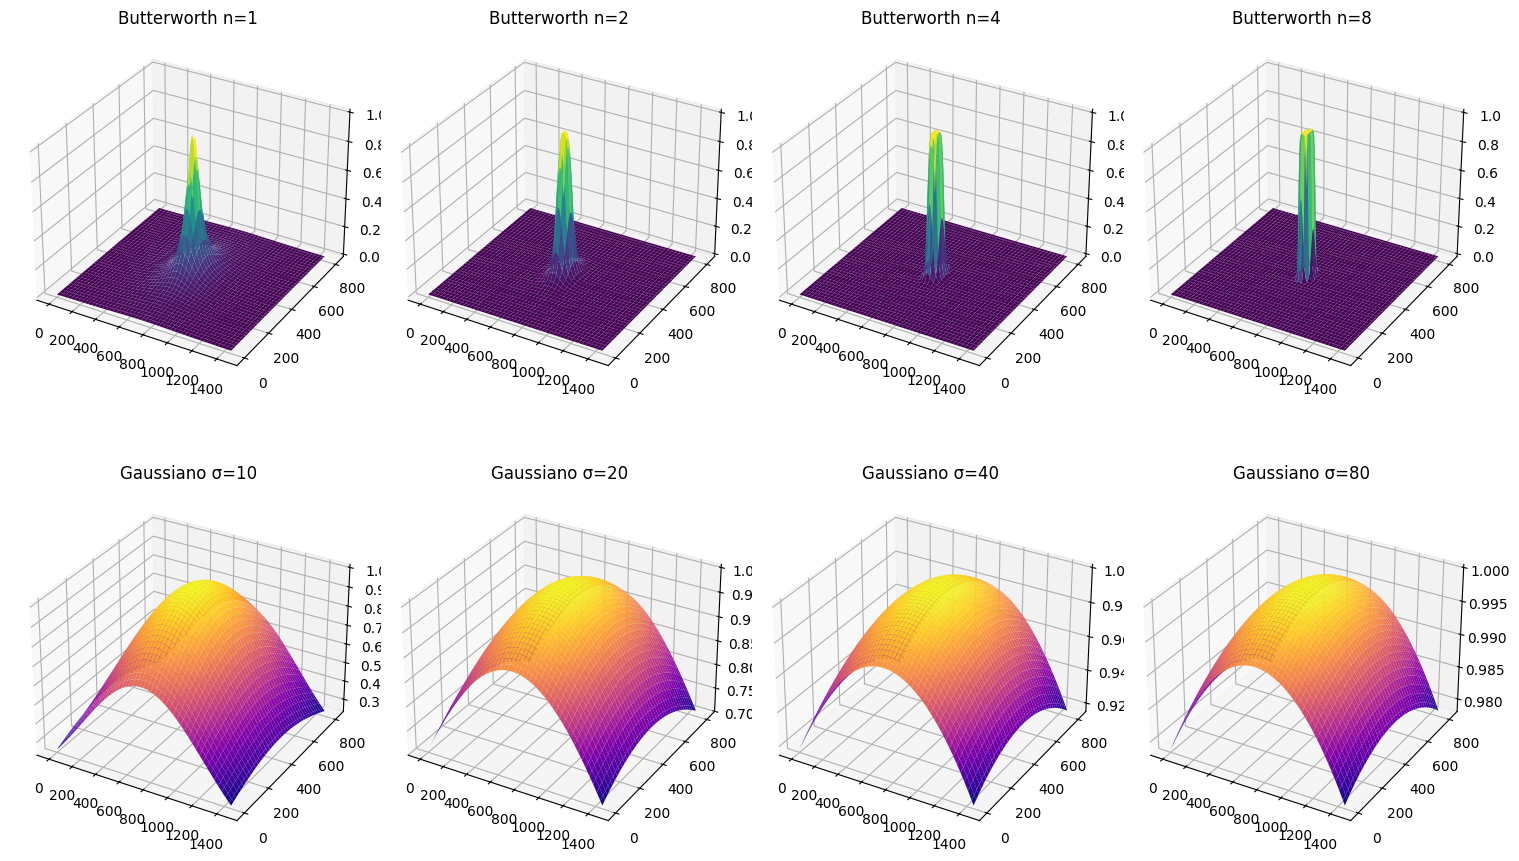

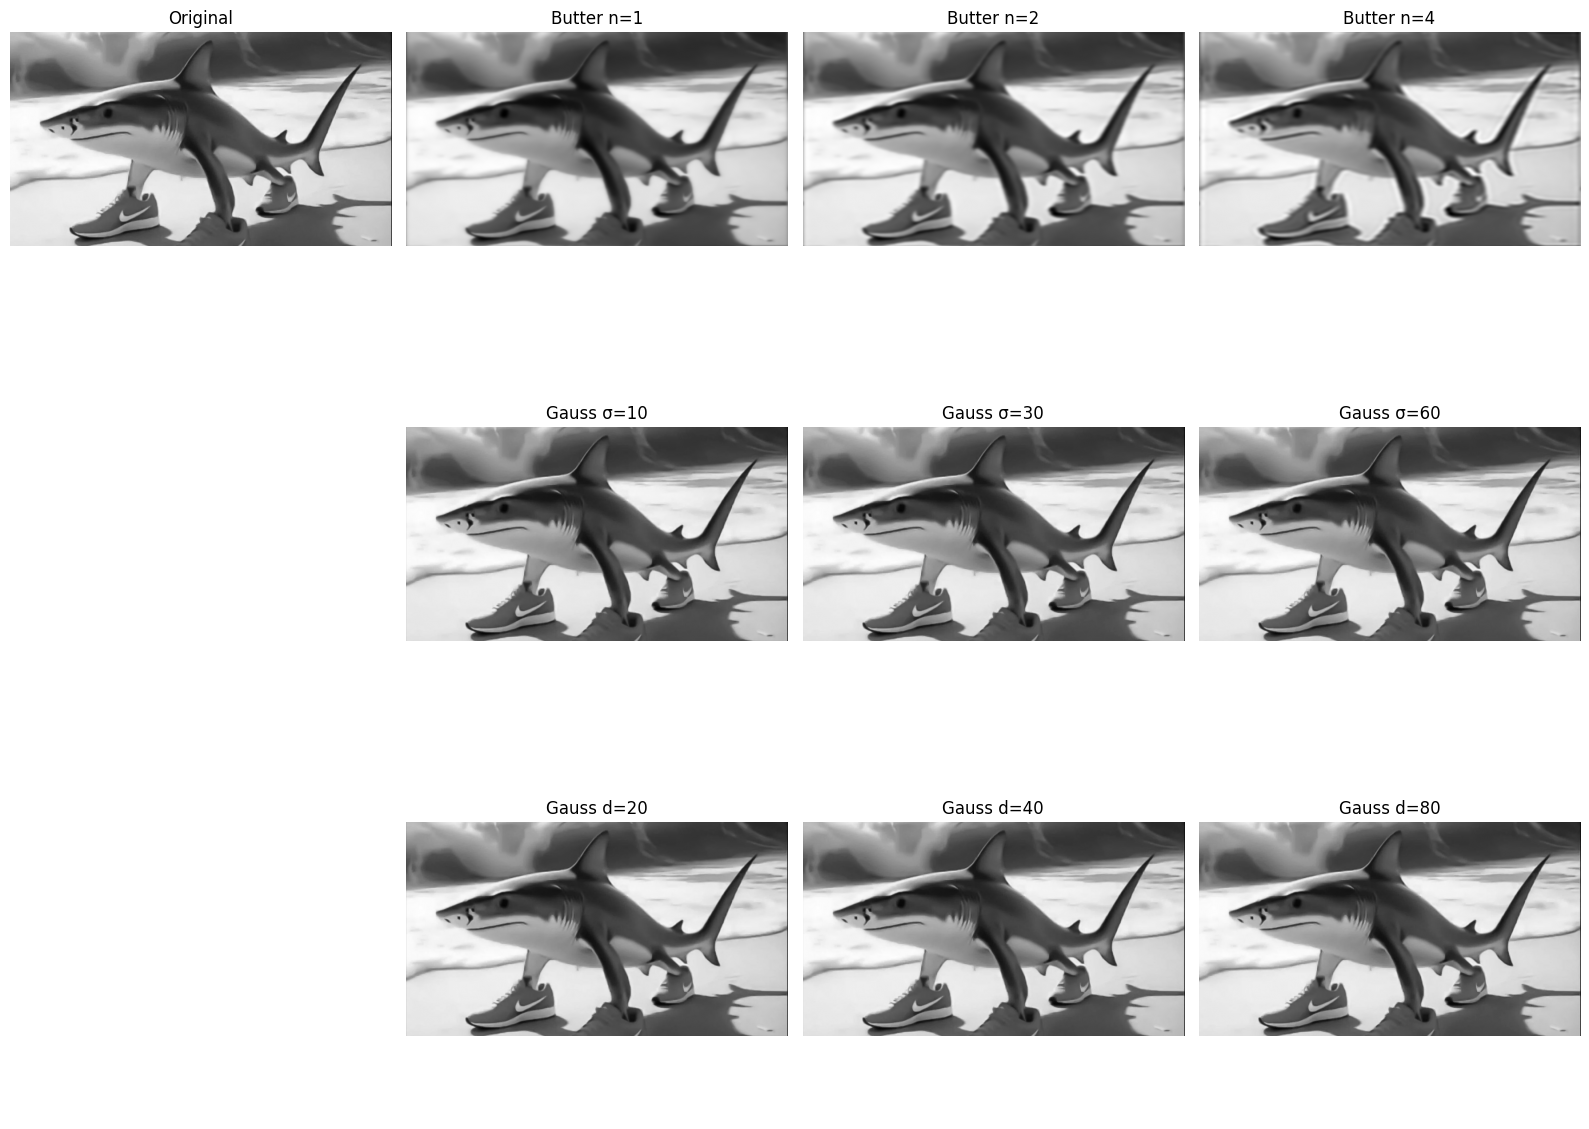

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import requests
from io import BytesIO

url = "https://static.wikia.nocookie.net/mamarre-estudios-espanol/images/3/37/Tralalerotralala.png/revision/latest?cb=20250502165312&path-prefix=es"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
image = np.array(img)

rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
u = np.arange(rows).reshape(-1, 1) - center_row
v = np.arange(cols) - center_col
D = np.sqrt(u**2 + v**2)

def butterworth_filter(D, cutoff, n):
    D[D == 0] = 1e-10
    return 1 / (1 + (D / cutoff) ** (2 * n))

def gaussian_filter(D, sigma, d0):
    return np.exp(-(D**2) / (2 * (sigma * d0)**2))

cutoff = 50
d0 = 50

fig = plt.figure(figsize=(15, 10))

n_values = [1, 2, 4, 8]
for i, n in enumerate(n_values):
    H = butterworth_filter(D.copy(), cutoff, n)
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    X, Y = np.meshgrid(np.arange(0, cols, 5), np.arange(0, rows, 5))
    ax.plot_surface(X, Y, H[::5, ::5], cmap='viridis')
    ax.set_title(f'Butterworth n={n}')

sigma_values = [10, 20, 40, 80]
for i, sigma in enumerate(sigma_values):
    H = gaussian_filter(D, sigma, d0)
    ax = fig.add_subplot(2, 4, i+5, projection='3d')
    X, Y = np.meshgrid(np.arange(0, cols, 5), np.arange(0, rows, 5))
    ax.plot_surface(X, Y, H[::5, ::5], cmap='plasma')
    ax.set_title(f'Gaussiano σ={sigma}')

plt.tight_layout()
plt.show()

f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')

for i, n in enumerate([1, 2, 4]):
    H = butterworth_filter(D.copy(), cutoff, n)
    filtered = np.real(np.fft.ifft2(np.fft.ifftshift(f_shift * H)))
    axes[0, i+1].imshow(filtered, cmap='gray')
    axes[0, i+1].set_title(f'Butter n={n}')

for i, sigma in enumerate([10, 30, 60]):
    H = gaussian_filter(D, sigma, d0)
    filtered = np.real(np.fft.ifft2(np.fft.ifftshift(f_shift * H)))
    axes[1, i+1].imshow(filtered, cmap='gray')
    axes[1, i+1].set_title(f'Gauss σ={sigma}')

d_values = [20, 40, 80]
for i, d in enumerate(d_values):
    H = gaussian_filter(D, 20, d)
    filtered = np.real(np.fft.ifft2(np.fft.ifftshift(f_shift * H)))
    axes[2, i+1].imshow(filtered, cmap='gray')
    axes[2, i+1].set_title(f'Gauss d={d}')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
